# ANLY 561 HW

Name:Yuqi Wang   
NetID:yw545

## Problem 1

Observe that this program  
$$
\min_{x\in\mathbb{R^n}}||{\bf y}-{\bf x}||_2^2 \text{ subject to } {\bf v}^T{\bf x} - b =0
$$  
Now we let $f({\bf x})=||{\bf y}-{\bf x}||_2^2$, $g({\bf x})={\bf v}^T{\bf x} - b =0$. Then we will have  
$$
\nabla g({\bf x})={\bf v}\neq {\bf 0} \text{ for all } {\bf x}\in\mathbb{R^n}
$$  
Thus, there exist a $\lambda\in\mathbb{R}$ such that $\nabla f({\bf x}^\ast)=\lambda\nabla g({\bf x}^\ast)$ where ${\bf x}^\ast$ is a minimizer of $f$ subject to the constraint $g$.  
Then, we have  
$$
\nabla f({\bf x})=2({\bf x}-{\bf y}), \nabla g({\bf x})={\bf v} \implies 2({\bf x}-{\bf y}) = \lambda{\bf v}
$$  
Solving ${\bf x}$,  
$$
{\bf x} = \frac{\lambda}{2}{\bf v}+{\bf y}
$$  
Plug this ${\bf x}$ into the constraint $g({\bf x})=0$ in order to get $\lambda$,  
$$
{\bf v}^T(\frac{\lambda}{2}{\bf v}+{\bf y}) - b =0 \\
\implies \frac{\lambda}{2}{\bf v}^T{\bf v}+{\bf v}^T{\bf y} = b \\
\implies \frac{\lambda}{2}||{\bf v}||_2^2=b-{\bf v}^T{\bf y}\\
\implies \lambda=\frac{2(b-{\bf v}^T{\bf y})}{||{\bf v}||_2^2}
$$  
Plug this $\lambda$ back into the expression of ${\bf x}$, then  
$$
{\bf x} = \frac{\frac{2(b-{\bf v}^T{\bf y})}{||{\bf v}||_2^2}}{2}{\bf v}+{\bf y} \\
\implies {\bf x} = {\frac{(b-{\bf v}^T{\bf y})}{||{\bf v}||_2^2}}{\bf v}+{\bf y} \\
\implies {\bf x} = {\frac{(b{\bf v}-{\bf v}^T{\bf y}{\bf v})}{||{\bf v}||_2^2}}+{\bf y}
$$

## Problem 2

In [15]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import pandas as pd

def random_circle(N):
    x = np.reshape(rd.randn(N*2), (N, 2))
    for i in range(N):
        x[i,:] = x[i,:]/np.sqrt(np.sum(x[i,:]**2))
    return x

def random_radius(N, R=1):
    r = rd.rand(N)
    return R*np.sqrt(r) # This ensures uniform sampling from the disc
    

def random_disc(N, mu=[0,0], R=1):
    x = random_circle(N)
    r = random_radius(N, R=R)
    for i in range(N):
        x[i, :] = r[i] * x[i, :] + mu
    return x

N = 10

X = np.zeros([20,2])
X[:10,:] = random_disc(N, mu=[-2, -2])
X[10:,:]  = random_disc(N, mu=[2, 2])
Y = np.zeros(20)
Y[:10] = -np.ones(10)
Y[10:] = np.ones(10)
mydict = {'X1': X[:,0], 'X2': X[:,1],'Y': Y}
data = pd.DataFrame(mydict)

print(data)

          X1        X2    Y
0  -1.371631 -2.258341 -1.0
1  -1.488895 -2.260009 -1.0
2  -1.866378 -1.776294 -1.0
3  -1.805355 -1.633059 -1.0
4  -2.152562 -2.563269 -1.0
5  -2.342608 -1.724407 -1.0
6  -2.108364 -2.852225 -1.0
7  -2.714519 -1.758886 -1.0
8  -1.704407 -2.094463 -1.0
9  -1.432416 -1.300421 -1.0
10  1.953568  2.660541  1.0
11  1.365924  1.502093  1.0
12  2.031358  1.443164  1.0
13  2.323736  1.616481  1.0
14  1.379934  1.908661  1.0
15  1.558145  2.338764  1.0
16  1.927289  1.635150  1.0
17  2.248332  1.968463  1.0
18  2.213318  2.210394  1.0
19  1.863444  2.297711  1.0


### Part (a)
Original program  
$$
f({\bf v}, b) = \frac{1}{2}||{\bf v}||^2 \\
h_i({\bf v}, b) = 1-y^{(i)}({\bf v}^T {\bf x}^{(i)}-b) \\
$$  
In Phase I,  
$$
\tilde{f}({\bf v}, b, z) = z \\
\tilde{h_i}({\bf v}, b, z)=1-y^{(i)}({\bf v}^T {\bf x}^{(i)}-b)-z
$$


We have ${\bf v}^{(0)}=(-20,20)$, $b^{(0)}=10$.  
In order to determine $z^{(0)}$, we have  
$$
z^{(0)}=\max(h_1({\bf v}^{(0)}, b^{(0)}),\ldots,h_{20}({\bf v}^{(0)},b^{(0)}))+1
$$

In [16]:
# input are x(i) and y(i)
# output is a function h(i)
def h_i(xi,yi):
    def hi(v):
        return 1-yi*(v[0]*xi[0]+v[1]*xi[1]-v[2])
    return hi

# find z(0)
h_v0 = list()
for i in range(20):
    hi = h_i(X[i,:],Y[i])
    h_v0.append(hi(np.array([-20, 20, 10])))
    
z0 = max(h_v0)+1
print(z0)

26.1450869905


**Phase I**

In [23]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import pandas as pd

def backtracking(x0, dx, f, df0, alpha=0.2, beta=0.8, verbose=False):
    '''
    Backtracking for general functions with illustrations
    :param x0: Previous point from backtracking, or initial guess
    :param dx: Incremental factor for updating x0
    :param f: Objective function
    :param df0: Gradient of f at x0
    :param alpha: Sloping factor of stopping criterion
    :param beta: "Agressiveness" parameter for backtracking steps
    :param verbose: Boolean for providing plots and data
    :return: x1, the next iterate in backtracking
    '''

    # Note that the definition below requires that dx and df0 have the same shape
    delta = alpha * np.sum(dx * df0) # A general, but memory intensive inner product
    
    t = 1 # Initialize t=beta^0
    f0 = f(x0) # Evaluate for future use
    x = x0 + dx # Initialize x_{0, inner}
    fx = f(x)
    
    if verbose:
        n=0
        xs = [x]
        fs = [fx]
        ts = [1] * 3
    
    while (not np.isfinite(fx)) or f0 + delta * t < fx:
        t = beta * t
        x = x0 + t * dx
        fx = f(x)
    ###################################### 
    
        if verbose:
            n += 1
            xs.append(x)
            fs.append(fx)
            ts.append(t)
            ts.pop(0)
            
    if verbose:
        # Display the function along the line search direction as a function of t
        s = np.linspace(-0.1*ts[-1], 1.1*ts[0], 100)
        xi = [0, 1.1*ts[0]]
        fxi = [f0, f0 + 1.1*ts[0]*delta]   
        y = np.zeros(len(s))
        
        for i in range(len(s)):
            y[i] = f(x0 + s[i]*dx) # Slow for vectorized functions

        plt.figure('Backtracking illustration')
        arm, =plt.plot(xi, fxi, '--', label='Armijo Criterion')
        fcn, =plt.plot(s, y, label='Objective Function')
        plt.plot([s[0], s[-1]], [0, 0], 'k--')
        pts =plt.scatter(ts, [0 for p in ts], label='Backtracking points for n=%d, %d, %d' % (n, n+1, n+2))
        plt.scatter(ts, [f(x0 + q*dx) for q in ts] , label='Backtracking values for n=%d, %d, %d' % (n, n+1, n+2))
        init =plt.scatter([0], [f0], color='black', label='Initial point')
        plt.xlabel('$t$')
        plt.ylabel('$f(x^{(k)}+t\Delta x^{(k+1)})$')
        plt.legend(handles=[arm, fcn, pts, init])
        plt.show()
        
        return x, xs, fs
    
    else:
        return x


def tilde_hi(Xi,Yi):
    def hi(v):
        return 1-Yi*(v[0]*Xi[0]+v[1]*Xi[1]-v[2])-v[3]
    return hi

def tilde_dhi(Xi,Yi):
    def dhi(v):
        return np.array([-Yi*Xi[0], -Yi*Xi[1], Yi, -1])
    return dhi


# Phase I

fun = lambda v: v[3]
dfun = lambda v: np.array([0,0,0,1])

tilde_h = list()
tilde_dh = list()

for i in range(20):
    tilde_h.append(tilde_hi(X[i,:],Y[i]))
    tilde_dh.append(tilde_dhi(X[i,:],Y[i]))

def log_tilde_h_list(tilde_h_list):
    def log_tilde_h(v):
        result =0
        for i in range(20):
            result += np.log(-tilde_h_list[i](v))
        return result
    return log_tilde_h

def dlog_tilde_dh_list(tilde_h_list,tilde_dh_list):
    def dlog_tilde_dh(v):
        result =0
        for i in range(20):
            result += tilde_dh_list[i](v)/tilde_h_list[i](v)
        return result
    return dlog_tilde_dh

lb1 = lambda v: fun(v) - (log_tilde_h_list(tilde_h)(v))
dlb1 = lambda v: dfun(v) - (dlog_tilde_dh_list(tilde_h,tilde_dh)(v))


v0 = np.array([-20, 20, 10, z0])
i=1
while v0[3] >= 0:
    x = backtracking(v0, -dlb1(v0), lb1, dlb1(v0))
    v0 = x
    i += 1

print(v0)
print('So v^(0) =',v0[:2],', b^(0) =', v0[2])

[  5.86465212  45.01203662   7.0367115   -0.52575948]
so v^(0) = [  5.86465212  45.01203662] , b^(0) = 7.03671150107


### Part (b) 

**Phase II**

In [24]:
from pprint import pprint
# Phase II

'''
Use 3 centering steps, 
M = 10, and 
5 iterations in the outer loop with 
2 inner loop iterations each. For each backtracking step, 
use Newton search directions, 
\alpha = 0.1, and 
\beta = 0.5.
'''
        
def _hi(Xi,Yi):
    def hi(v):
        return 1-Yi*(v[0]*Xi[0]+v[1]*Xi[1]-v[2])
    return hi

def _dhi(Xi,Yi):
    def dhi(v):
        return np.array([-Yi*Xi[0], -Yi*Xi[1], Yi])
    return dhi


fun = lambda v: 0.5*(v[0]**2+v[1]**2)
dfun = lambda v: np.array([v[0],v[1],0])
d2fun = lambda v: np.array([[1,0,0],[0,1,0],[0,0,0]])

_h = list()
_dh = list()

for i in range(20):
    _h.append(_hi(X[i,:],Y[i]))
    _dh.append(_dhi(X[i,:],Y[i]))

def log_h_list(_h_list):
    def log_h(v):
        result =0
        for i in range(20):
            result += np.log(-_h_list[i](v))
        return result
    return log_h


def dlog_dh_list(_h_list,_dh_list):
    def dlog_dh(v):
        result = 0
        for i in range(20):
            result += _dh_list[i](v)/_h_list[i](v)
        return result
    return dlog_dh

def d2log_dh_list(_h_list,_dh_list):
    def d2log_dh(v):
        result = np.zeros([3,3])
        for i in range(20):
            result[0,:] += (_dh_list[i](v)/_h_list[i](v)**2)*(-_dh_list[i](v)[0])
            result[1,:] += (_dh_list[i](v)/_h_list[i](v)**2)*(-_dh_list[i](v)[1])
            result[2,:] += (_dh_list[i](v)/_h_list[i](v)**2)*(-_dh_list[i](v)[2])
        return result
    return d2log_dh


lb1 = lambda v: fun(v) - (log_h_list(_h)(v))
dlb1 = lambda v: dfun(v) - (dlog_dh_list(_h,_dh)(v))
d2lb1 = lambda v: d2fun(v) - (d2log_dh_list(_h,_dh)(v))

alpha = 0.1
beta = 0.5

# 3 centering steps
v_nm_btlb_center = [v0[:3]]

v = v0[:3]
for i in range(3):
    v = backtracking(v, - np.linalg.solve(d2lb1(v), dlb1(v)), lb1, dlb1(v), alpha=alpha, beta=beta)
    v_nm_btlb_center.append(v)
    
# The process of 3 centering steps
print('\nThe process of 3 centering steps:\nv:')
pprint(v_nm_btlb_center)



The process of 3 centering steps:
v:
[array([  5.86465212,  45.01203662,   7.0367115 ]),
 array([  3.3165397 ,  22.89722371,  -4.18577739]),
 array([  2.38362991,  12.18840074,   1.1990782 ]),
 array([ 2.36128349,  2.42150559, -2.05818651])]


C:\Users\45336\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in log


In [47]:
t = 1
M = 10

v_nm_btlb = [v_nm_btlb_center[-1]]
v = v_nm_btlb_center[-1]
for i in range(5):
    
    t = t/M
    lb = lambda v: fun(v) - t*(log_h_list(_h)(v))
    dlb = lambda v: dfun(v) - t*(dlog_dh_list(_h,_dh)(v))
    d2lb = lambda v: d2fun(v) - t*(d2log_dh_list(_h,_dh)(v))
    
    for j in range(2):
        v = backtracking(v, - np.linalg.solve(d2lb(v), dlb(v)), lb, dlb(v), alpha=alpha, beta=beta)
        v_nm_btlb.append(v)

# The process of 5 outer loops with 2 inner loops
print('\nThe process of 5 outer loops with 2 inner loops: \nv:')
pprint(v_nm_btlb)
vb = v


The process of 5 outer loops with 2 inner loops: 
v:
[array([ 2.36128349,  2.42150559, -2.05818651]),
 array([ 1.55995985,  1.60824693,  0.24391695]),
 array([ 1.03321829,  1.08118001, -0.23871204]),
 array([ 0.64054145,  0.67010305,  0.1079612 ]),
 array([ 0.52421354,  0.54786324, -0.02007627]),
 array([ 0.41811034,  0.4368175 ,  0.007853  ]),
 array([ 0.36088282,  0.37629055,  0.01790334]),
 array([ 0.3550585 ,  0.37000724,  0.02499225]),
 array([ 0.35080077,  0.36487887,  0.02540899]),
 array([ 0.35042099,  0.3640765 ,  0.02490371]),
 array([ 0.35112429,  0.36314425,  0.02499911])]
[ 0.35112429  0.36314425  0.02499911]


C:\Users\45336\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in log


### Part (c) 

primal-dual algorithm：

0.0908463959054
454.508244415


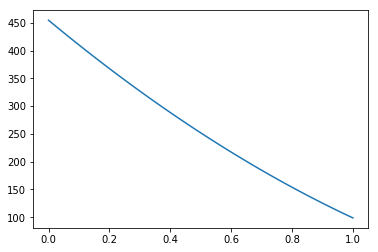

0.30900466254
132.702591102


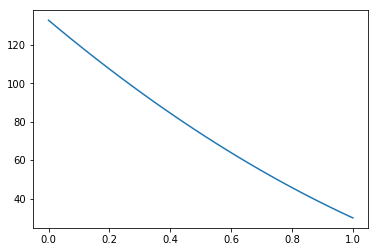

1.02157810925
39.8972503042


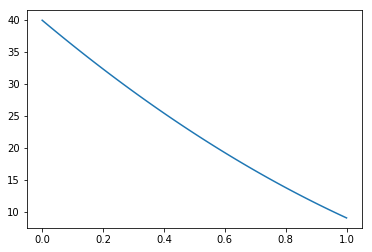

3.37774561004
12.0174982095


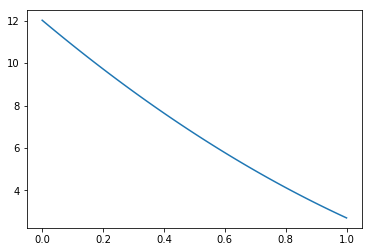

11.1718774585
3.62350209865


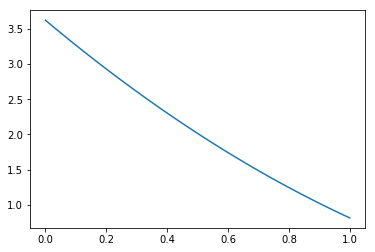

36.9897254639
1.09244168735


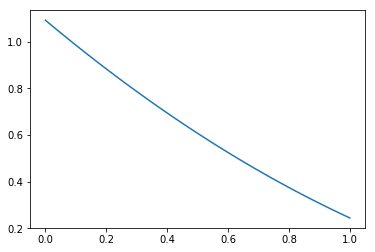

122.896238004
0.328465186861


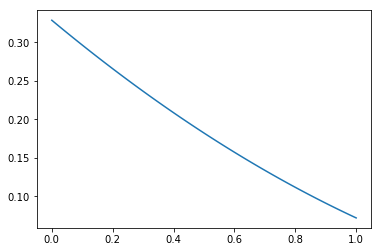

413.164743569
0.0977031352716


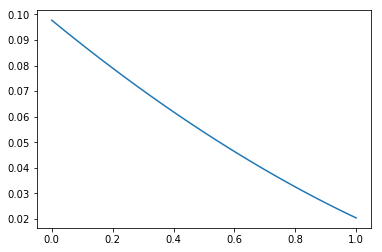

1449.90832415
0.0280420331327


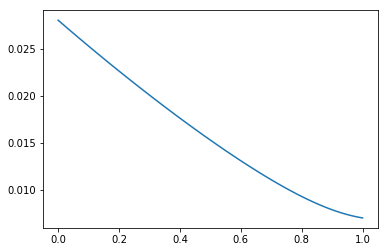

2486.02633023
0.0165309849095


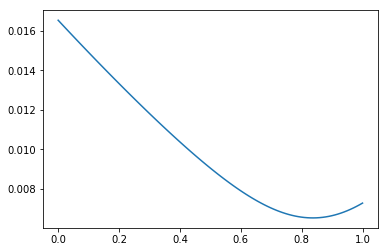

Numerical solution after 10 steps:
x = [ 0.36327919  0.37748466  0.01631424]
mu = [ 0.00914763  0.00832481  0.00885774  0.0106077   0.00482368  0.00646662
  0.00441104  0.00512369  0.00796104  0.04017213  0.00519459  0.03223388
  0.0109274   0.00728878  0.01393938  0.0078604   0.01009814  0.00620649
  0.00559006  0.00655698]
[ 0.36327919  0.37748466  0.01631424]


In [49]:
############################
# Prime dual
############################

f = lambda v: 0.5*(v[0]**2+v[1]**2)
df = lambda v: np.array([v[0],v[1],0])
d2f = lambda v: np.array([[1,0,0],[0,1,0],[0,0,0]])

def l2(x):
    return np.sqrt(np.sum(x**2))


_h = list()
_dh = list()

for i in range(20):
    _h.append(_hi(X[i,:],YY[i,0]))
    _dh.append(_dhi(X[i,:],YY[i,0]))


def produce_h(h_list):
    def h(x):
        result = np.zeros(len(h_list))
        for i in range(len(h_list)):
            result[i]=h_list[i](x)
        return result
    return h

def produce_dh(dh_list):
    def dh(x):
        result = np.zeros([len(dh_list),3])
        for i in range(len(dh_list)):
            result[i:]=dh_list[i](x)
        return result
    return dh

h = lambda x: produce_h(_h)(x)
dh = lambda x: produce_dh(_dh)(x)
d2h = lambda x: np.zeros([20,3])

def diagnostic(d, x, mu, t, dx_mu):
    n = 100
    s = np.linspace(0, 1.0, n)
    vals = np.zeros(n)
    for i in range(n):
        vals[i] = l2(phi(x + s[i]*dx_mu[:d], mu + s[i]*dx_mu[d:], t))
        
    plt.plot(s, vals)
    plt.show()
    

num_iter = 10
d = 3 # dimension of the program
m = 20 # number of inequality constraints
x0 = np.array([ 10.95975037,  45.39047379,   8.08724208])
mu0 = np.ones(20) # initial value for mu

nu = 10 # Interior point scaling parameter

phi = lambda x, mu, t:  np.concatenate((df(x)+ sum([mu[i]*dh(x)[i] for i in range(20)]),-np.array([mu[i]*h(x)[i] for i in range(20)])-1/t))
dphi = lambda x, mu: np.reshape(np.block([[d2f(x), np.transpose(dh(x))], [-np.diag(mu)@dh(x), -np.diag(h(x))]]), (d+m, d+m)) 

# Backtracking parameters
alpha = 0.1
beta = 0.5

eta = lambda x, mu: sum(-h(x)*mu) # Computation of surrogate duality gap

x = x0
mu = mu0
for i in range(num_iter):
    t = nu * m / eta(x, mu)
    phi0 = phi(x,mu,t)
    
    norm_phi0 = l2(phi0)
    print(t)
    print(norm_phi0)
    
    # Compute the Newton search direction

    dx_mu = -np.linalg.solve(dphi(x, mu), phi0)
    
    # Initialize backtracking
    s = 1 # using s for backtracking parameter since t is taken
    
    yx = x + s*dx_mu[:d]
    ymu = mu + s*dx_mu[d:]
    hyx = h(yx)
    phiy = phi(yx, ymu, t)
    norm_phiy = l2(phiy)
    
    diagnostic(d, x, mu, t, dx_mu)

    
    n = 0
    
    while 0 < ymu[ymu<=0].size or 0 < hyx[0<=hyx].size or (1-alpha*s)*norm_phi0 < norm_phiy:
        s = beta * s
        yx = x + s*dx_mu[:d]
        ymu = mu + s*dx_mu[d:]
        hyx = h(yx)
        phiy = phi(yx, ymu, t)
        norm_phiy = l2(phiy)
        n += 1
        
    x = yx
    mu = ymu


print('Numerical solution after %d steps:' % num_iter)
print('x =',x)
print('mu =',mu)
vc = x

### Part (d)



In [53]:
print(v0[:3])
print(vb)
print(vc)

[  5.86465212  45.01203662   7.0367115 ]
[ 0.35112429  0.36314425  0.02499911]
[ 0.36327919  0.37748466  0.01631424]


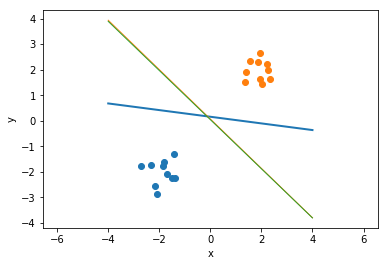

In [67]:
# For all parts

V0 = v0[:2]
b0 = v0[2]

Vb = vb[:2]
bb = vb[2]

Vc = vc[:2]
bc = vc[2]


plt.scatter(X[:10,0], X[:10,1])
plt.scatter(X[10:,0], X[10:,1])
x = np.linspace(-4, 4)
plt.plot(x, (b0-x*V0[0])/V0[1], linewidth=2)
plt.plot(x, (bb-x*Vb[0])/Vb[1], linewidth=1)
plt.plot(x, (bc-x*Vc[0])/Vc[1], linewidth=1)

plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

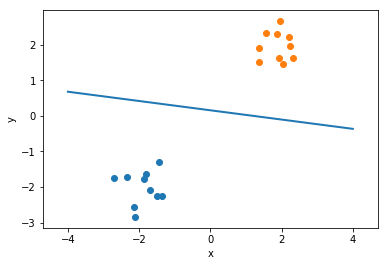

In [68]:
# From part(a)

V = v0[:2]
b = v0[2]


plt.scatter(X[:10,0], X[:10,1])
plt.scatter(X[10:,0], X[10:,1])
x = np.linspace(-4, 4)
plt.plot(x, (b-x*V[0])/V[1], linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

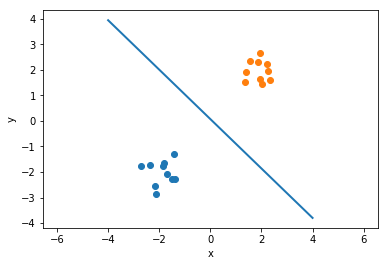

In [69]:
# From part(b)

V = vb[:2]
b = vb[2]


plt.scatter(X[:10,0], X[:10,1])
plt.scatter(X[10:,0], X[10:,1])
x = np.linspace(-4, 4)
plt.plot(x, (b-x*V[0])/V[1], linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

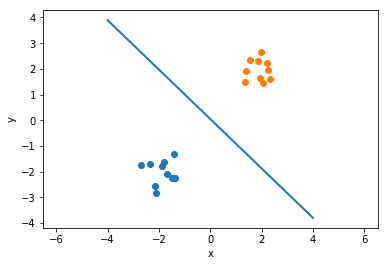

In [70]:
# From part(c)

V = vc[:2]
b = vc[2]


plt.scatter(X[:10,0], X[:10,1])
plt.scatter(X[10:,0], X[10:,1])
x = np.linspace(-4, 4)
plt.plot(x, (b-x*V[0])/V[1], linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

**********************************